### Correlation Methods
This demo will show you several method of direct correlation method.    
Direct correlation is easy but less sensitive way for functional connection analysis.    
#### **Methods below includes**:
1. Seed point Correlation(window-slide)
    
2. Correlation matrix (window-slide)
    
3. Contralateral similarity calculation    
    
___

(18025, 330, 285)


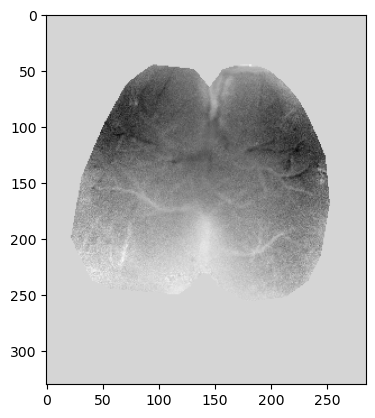

In [7]:
# import and basic path part
import Common_Functions as cf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tqdm import tqdm
import pandas as pd
from Atlas_Corr_Tools import Atlas_Data_Tools,Contra_Similar
from Brain_Atlas.Atlas_Mask import Mask_Generator

wp = r'D:\ZR\_Data_Temp\Ois200_Data\Full_Demo\Wild_Type\Preprocessed'
series = np.load(cf.join(wp,'z_series.npy'))

# join chamber mask with brain area mask, getting only mask with values.
mask = cv2.imread(cf.join(wp,'Chamber_mask.png'),0)>0
joint_mask = (series.std(0)>0)*mask

# mask and clip input graph.
# NOTE this part is important for getting correct results.
series = np.clip(series,-3,3)*joint_mask
MG = Mask_Generator(bin=4)

print(series.shape)
plt.imshow(series[234,:,:],cmap='gray')
# plt.imshow(joint_mask)

___
- #####  Part 1, Seed point correlation.    

It's quite easy, provide a seed mask, corr with mask will be calculated.  
 
Actually, I don't like seed point methods.    
This method will provide only **long-term** correlation, and nearby area have higher corr.    
Different seed will return different results.


  0%|          | 0/55 [00:00<?, ?it/s]c:\ProgramData\anaconda3\envs\Lulab_OI_Env\lib\site-packages\scipy\stats\_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
100%|██████████| 55/55 [07:17<00:00,  7.95s/it]

(55, 330, 285)


<AxesSubplot: >

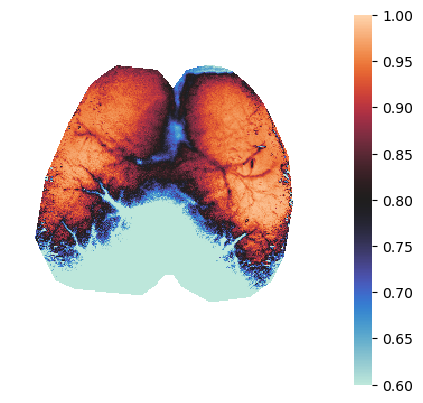

In [15]:
# first, you need to select a mask of seed. 
from OI_Functions.Seed_Functions import  *
seed_mask = MG.Get_Mask(area='SSp-bfd',LR='R')*joint_mask# you need this mask to get pix with value.
fps = 5 # in Hz
win_step = 60*fps # in seconds
win_size = 300*fps # in seconds

# This single function will do the job of seed point corr.
Corr_Wins = Seed_Window_Slide(seed_mask=seed_mask,response_matrix=series,win_size=win_size,win_step=win_step)
print(Corr_Wins.shape)
sns.heatmap(Corr_Wins[0],xticklabels=False,yticklabels=False,square=True,center=0.8,vmax = 1,vmin =0.6)

- Save Seedpoint-Corr graphs in folder.

In [16]:
savepath = cf.join(wp,'Seed_SSp-bfd_R')
cf.mkdir(savepath)
for i in tqdm(range(len(Corr_Wins))):
    c_corr = Corr_Wins[i,:,:]
    plt.clf()
    # plt.cla()
    fig,ax = plt.subplots(ncols=1,nrows=1,figsize = (5,5),dpi = 240)
    sns.heatmap(c_corr,xticklabels=False,yticklabels=False,square=True,ax = ax,center=0.8,vmax = 1,vmin =0.6)
    fig.savefig(cf.join(savepath,f'{10000+i}.png'))
    plt.close(fig)

  2%|▏         | 1/55 [00:00<00:19,  2.82it/s]

100%|██████████| 55/55 [00:19<00:00,  2.82it/s]


<Figure size 640x480 with 0 Axes>

___
- ##### Part 2, correlation matrix. 
   
I packed a correlation matrix method, use function below, you'll do this quite easy.    
**Remember to add a chamber mask!**

In [40]:
from Atlas_Corr_Tools import  *
ADT = Atlas_Data_Tools(series=series,bin=4,min_pix=100) 
# brain area less than min_pix will be ignored.

# calculate response of all brain area
ADT.Get_All_Area_Response()
# variables below are useful. But here they will not be used. Try it by yourself if you are interested.
Area_Response = ADT.Area_Response # see P1A1 for more details
Area_Response_Heatmap = ADT.Combine_Response_Heatmap() # heatmap of all area response. 

# get slide window correlation matrix. 
# If you set win_size = len(series), whole-series corr will be calculated.
fps = 5
win_size = 300*fps
# win_size = len(series)
win_step = 60*fps
Corr_Matrix = ADT.Get_Corr_Matrix(win_size = win_size,win_step = win_step,keep_unilateral = False)
# keep_unilateral = False will delete brain area have only unilateral data.
# Corr_Matrix is a dict, each element is a area_num x area_num matrix.

Calculating All Brain Area Response...


31it [00:19,  1.57it/s]


Combining Heatmap of Brain Area Response...


100%|██████████| 45/45 [00:00<00:00, 124.66it/s]


Calculating Correlation Matrix of given data frames.


100%|██████████| 56/56 [01:21<00:00,  1.45s/it]


- Show example Corr matrix.    
**NOTE:**Area have already been re-arranged.    
So you will see X-line for good hemisphere-symetry data.

[Text(0, 0.5, 'VISrl_L'),
 Text(0, 1.5, 'VISpm_L'),
 Text(0, 2.5, 'VISp_L'),
 Text(0, 3.5, 'VISl_L'),
 Text(0, 4.5, 'VISam_L'),
 Text(0, 5.5, 'VISal_L'),
 Text(0, 6.5, 'VISa_L'),
 Text(0, 7.5, 'SSs_L'),
 Text(0, 8.5, 'SSp-un_L'),
 Text(0, 9.5, 'SSp-ul_L'),
 Text(0, 10.5, 'SSp-tr_L'),
 Text(0, 11.5, 'SSp-n_L'),
 Text(0, 12.5, 'SSp-m_L'),
 Text(0, 13.5, 'SSp-ll_L'),
 Text(0, 14.5, 'SSp-bfd_L'),
 Text(0, 15.5, 'RSPv_L'),
 Text(0, 16.5, 'RSPd_L'),
 Text(0, 17.5, 'RSPagl_L'),
 Text(0, 18.5, 'ACAd_L'),
 Text(0, 19.5, 'MOs_L'),
 Text(0, 20.5, 'MOp_L'),
 Text(0, 21.5, 'MOp_R'),
 Text(0, 22.5, 'MOs_R'),
 Text(0, 23.5, 'ACAd_R'),
 Text(0, 24.5, 'RSPagl_R'),
 Text(0, 25.5, 'RSPd_R'),
 Text(0, 26.5, 'RSPv_R'),
 Text(0, 27.5, 'SSp-bfd_R'),
 Text(0, 28.5, 'SSp-ll_R'),
 Text(0, 29.5, 'SSp-m_R'),
 Text(0, 30.5, 'SSp-n_R'),
 Text(0, 31.5, 'SSp-tr_R'),
 Text(0, 32.5, 'SSp-ul_R'),
 Text(0, 33.5, 'SSp-un_R'),
 Text(0, 34.5, 'SSs_R'),
 Text(0, 35.5, 'VISa_R'),
 Text(0, 36.5, 'VISal_R'),
 Text(0, 37.5, 'VIS

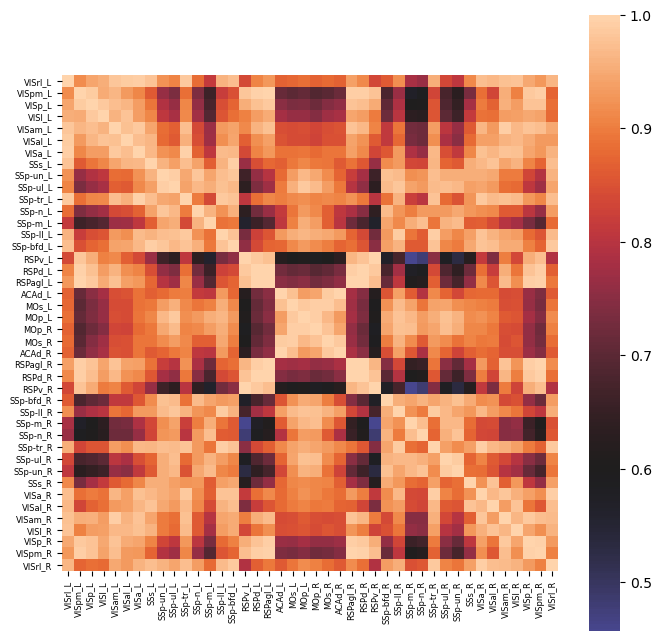

In [42]:

fig,ax = plt.subplots(ncols=1,nrows=1,figsize = (8,8))
sns.heatmap(Corr_Matrix[1],center = 0.6,square = True,xticklabels = False,yticklabels = False,ax = ax)

# below adjust size of annotation brain area.
ax.set_xticks(np.array(range(len(Corr_Matrix[1].index)))+0.5)
ax.set_xticklabels(Corr_Matrix[1].index,size = 6,rotation = 90)
ax.set_yticks(np.array(range(len(Corr_Matrix[1].index)))+0.5)
ax.set_yticklabels(Corr_Matrix[1].index,size = 6)

In [43]:
# plot and save all corr matrixes.
savepath = cf.join(wp,'Corr_Matrix')
cf.mkdir(savepath)
for i in tqdm(range(len(Corr_Matrix))):
    # c_corr = Corr_Matrix[i]
    plt.clf()
    # plt.cla()
    fig,ax = plt.subplots(ncols=1,nrows=1,figsize = (8,8))
    sns.heatmap(Corr_Matrix[i],center = 0.6,square = True,xticklabels = False,yticklabels = False,ax = ax)

    # below adjust size of annotation brain area.
    ax.set_xticks(np.array(range(len(Corr_Matrix[i].index)))+0.5)
    ax.set_xticklabels(Corr_Matrix[1].index,size = 6,rotation = 90)
    ax.set_yticks(np.array(range(len(Corr_Matrix[i].index)))+0.5)
    ax.set_yticklabels(Corr_Matrix[1].index,size = 6)
    fig.savefig(cf.join(savepath,f'{10000+i}.png'))
    plt.close(fig)



Folder D:\ZR\_Data_Temp\Ois200_Data\Full_Demo\Wild_Type\Preprocessed\Corr_Matrix already exists!


100%|██████████| 56/56 [00:25<00:00,  2.24it/s]


<Figure size 640x480 with 0 Axes>

___
- ##### Part 3, Contralateral Consistency
This part will show you how to calculate contralateral consistency of pixels inside area.    
Further more, this demo shows how to add up different brain areas, getting a cross-brain connectivity graph.

- We have function for pix-wise contralateral correlation.

In [2]:
# do win-slide for 
contra_matrix = np.load(cf.join(wp,'contralateral_sim.npy'))
from Atlas_Corr_Tools import Contra_Similar
N_frame,height,width = series.shape
fps = 5
win_size = 300*fps
win_step = 60*fps
winnum = (N_frame-win_size)//win_step+1
contra_matrix = np.zeros(shape = (winnum,height,width),dtype='f8')

# calculate contralatera similarity of each window.
# NOTE This graph is strictly symmetry.
for i in tqdm(range(winnum)):
    c_series = series[i*win_step:i*win_step+win_size,:,:]
    c_sim = Contra_Similar(c_series,bin=4)
    contra_matrix[i,:,:] = c_sim
    
np.save(cf.join(wp,'contralateral_sim'),contra_matrix)
# show example contralateral similar map.
sns.heatmap(contra_matrix[0,:,:],center = 0.6,square = True,xticklabels = False,yticklabels = False)

  0%|          | 0/56 [00:00<?, ?it/s]

100%|██████████| 56/56 [08:53<00:00,  9.53s/it]


NameError: name 'cj' is not defined

In [8]:
# save contralateral matrix.
savepath = cf.join(wp,'Contralateral_Similarity')
cf.mkdir(savepath)

for i in tqdm(range(winnum)):
    plt.clf()
    # plt.cla()
    fig,ax = plt.subplots(ncols=1,nrows=1,figsize = (8,8))
    sns.heatmap(contra_matrix[i,:,:],center = 0.6,vmax = 1,vmin = 0.2,square = True,xticklabels = False,yticklabels = False,ax = ax)
    fig.savefig(cf.join(savepath,f'{10000+i}.png'))
    plt.close(fig)

# as you can see, no significant difference found for brain area in wild-type mice.

Folder D:\ZR\_Data_Temp\Ois200_Data\Full_Demo\Wild_Type\Preprocessed\Contralateral_Similarity already exists!


100%|██████████| 56/56 [00:16<00:00,  3.37it/s]


<Figure size 640x480 with 0 Axes>

- Function 'Mask_Generator' can average result graph by brain area.     
It can also visualize brain area map from a data frame.

In [6]:
graph = contra_matrix[0,:,:]
graph_mask = graph != 0

c_response = MG.Avr_By_Area(graph=graph,min_pix = 100)
c_response


AttributeError: 'numpy.ndarray' object has no attribute 'avr'

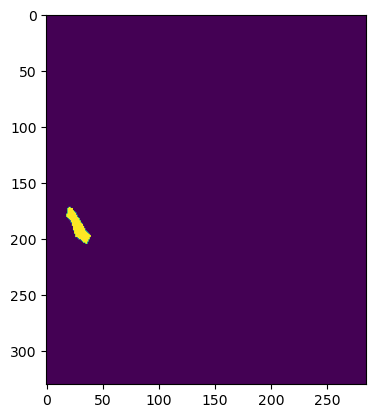

In [15]:
plt.imshow(MG.masks.loc[1,'Mask'])
